# Understanding Support Vector Machine

Below are the imports we need to implement the <b> Support Vector Machine </b>

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
import seaborn as sns;
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

Now lets read the data. This is the data from <a href="https://www.kaggle.com/jsphyg/weather-dataset-rattle-package"> Kaggle </a>. From the page we have the below information:
<p><i>This dataset contains daily weather observations from numerous Australian weather stations.

The target variable RainTomorrow means: Did it rain the next day? Yes or No. </p></i>

In [3]:
# Read the data
data = pd.read_csv('weatherAUS.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In the above data, for the simplicity, we remove the columns where <b>Categorical Data</b> is present. This is not the requirement of <b>Support Vector Machine </b>, but just to keep the implementation simple.

In [4]:
data = data.drop(columns= [ 'Date', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'Cloud3pm', 'Cloud9am'], axis = 1)

In [5]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow
0,Albury,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,No
1,Albury,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,No
2,Albury,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,No
3,Albury,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,1.0,No
4,Albury,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.2,No


### Extracting only the Sydney Data

This data contains information for many cities hence we pick only data for <b>Adelaide</b>

In [6]:
sydney_data = data[data['Location'] == 'Sydney']

In [7]:
sydney_data.shape

(3337, 15)

## Missing Data

Now the below is just a function where we print out if our data contains any missing values or not. If any column has missing values we write the number of missing rows.
<p> Replacing the missing values is one of the most important step in the Machine Learning Process</p>

In [8]:
def printCountOfMissingValues(data):
    for col in data.columns:
        isAny = data[col].isnull().any()
        if isAny:
            missing_rows_count = data[data[col].isnull() == True].shape[0]
            print (col + ' has ' + str(missing_rows_count) + ' missing rows')
        else:
            print (col + ' has no missing rows')

In [9]:
sydney_data = sydney_data.drop(columns = ['WindGustSpeed'], axis = 1)
sydney_data.head()

printCountOfMissingValues(sydney_data)

Location has no missing rows
MinTemp has 3 missing rows
MaxTemp has 2 missing rows
Rainfall has 6 missing rows
WindSpeed9am has 26 missing rows
WindSpeed3pm has 25 missing rows
Humidity9am has 14 missing rows
Humidity3pm has 13 missing rows
Pressure9am has 20 missing rows
Pressure3pm has 19 missing rows
Temp9am has 4 missing rows
Temp3pm has 4 missing rows
RISK_MM has no missing rows
RainTomorrow has no missing rows


From the data we can see that there are two main groups of missing information. First are those columns having only some values missing

Others having more than 10 values.

In [10]:
for col in sydney_data.columns:
    count = sydney_data[sydney_data[col].isnull() == True].shape[0]
    
    if count < 10:
        sydney_data[col] = sydney_data[col].fillna(method ='bfill')
    else:
        sydney_data[col] = sydney_data[col].fillna(sydney_data[col].mean())

printCountOfMissingValues(sydney_data)

Location has no missing rows
MinTemp has no missing rows
MaxTemp has no missing rows
Rainfall has no missing rows
WindSpeed9am has no missing rows
WindSpeed3pm has no missing rows
Humidity9am has no missing rows
Humidity3pm has no missing rows
Pressure9am has no missing rows
Pressure3pm has no missing rows
Temp9am has no missing rows
Temp3pm has no missing rows
RISK_MM has no missing rows
RainTomorrow has no missing rows


## Correlation

Correlation is defined as the relation between two features in our observations. If the two features are correlated we need to resolve this. There are many ways to handle Correlation. Lets see if we any features in our data correlated or not

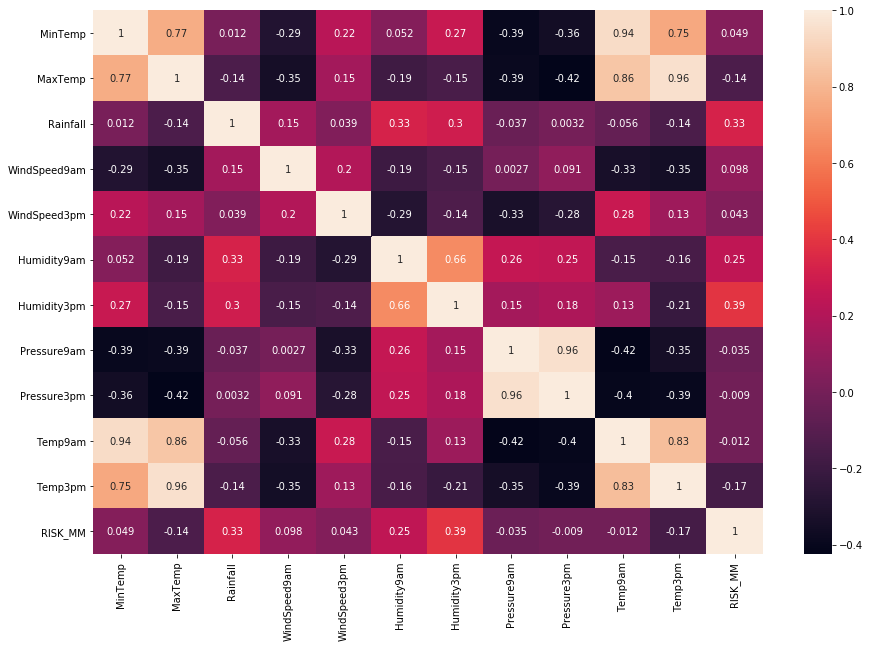

In [11]:
plt.figure(figsize=(15, 10))
sns.heatmap(sydney_data.corr(), annot = True, annot_kws={"size": 10})
plt.show()

In [12]:
sydney_data = sydney_data.drop(columns= [ 'MaxTemp', 'WindSpeed9am', 'Humidity9am', 'Pressure9am', 'Temp9am'], axis = 1)

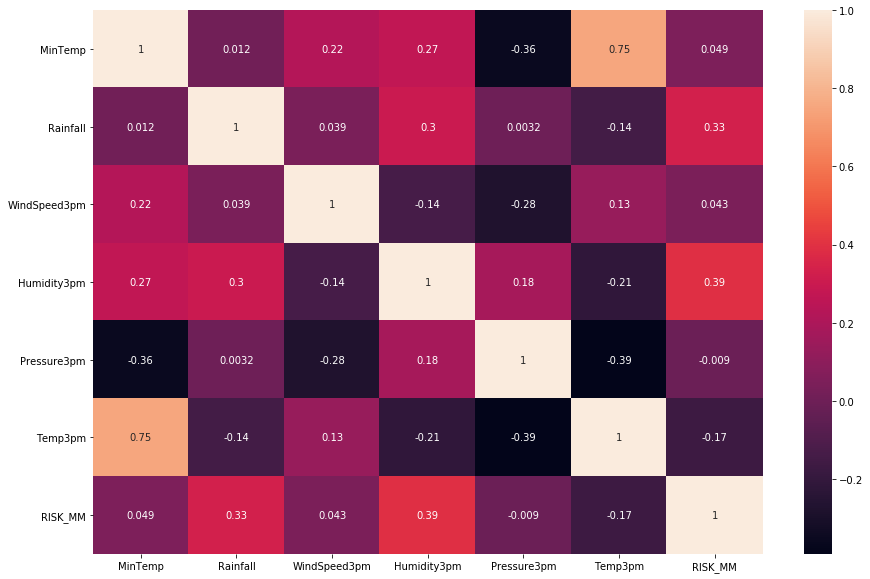

In [13]:
plt.figure(figsize=(15, 10))
sns.heatmap(sydney_data.corr(), annot = True, annot_kws={"size": 10})
plt.show()

We still see <b>Temp3pm</b> and <b>Humidity3pm</b> are still correlated. Lets keep them as it is for the time being

In [14]:
sydney_data.head()

,Location,MinTemp,Rainfall,WindSpeed3pm,Humidity3pm,Pressure3pm,Temp3pm,RISK_MM,RainTomorrow
29497,Sydney,19.5,15.6,20.0,84.0,1017.4,20.9,6.0,Yes
29498,Sydney,19.5,6.0,13.0,73.0,1016.4,24.8,6.6,Yes
29499,Sydney,21.6,6.6,2.0,86.0,1015.6,23.0,18.8,Yes
29500,Sydney,20.2,18.8,20.0,90.0,1011.8,20.9,77.4,Yes
29501,Sydney,19.7,77.4,6.0,74.0,1004.8,25.5,1.6,Yes


## Applying Support Vector Machine

In [15]:
y = sydney_data["RainTomorrow"]
X = sydney_data.drop(columns = ['Location', 'RainTomorrow'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [16]:
# Fitting SVM to the Training set
classifier = SVC(kernel = 'linear', random_state = 10)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=10, shrinking=True, tol=0.001,
    verbose=False)

In [17]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

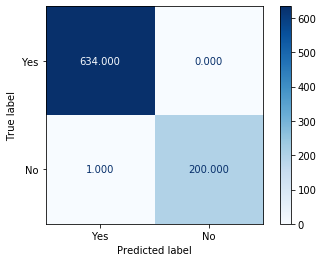

In [18]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
class_names = ['Yes', 'No']
plot = plot_confusion_matrix(classifier, 
                             X_test, 
                             y_test, 
                             values_format='.3f', 
                             cmap=plt.cm.Blues, 
                             normalize= None, 
                             display_labels=class_names)
